# 泰坦尼克号数据分析

## 背景介绍
引用了 https://www.kaggle.com/c/titanic 的描述  

RMS泰坦尼克号的沉没是历史上最臭名昭着的沉船之一。 1912年4月15日，在首次航行期间，泰坦尼克号撞上冰山后沉没，2224名乘客和机组人员中有1502人遇难。 这场轰动的悲剧震撼了国际社会，并导致了更好的船舶安全条例。
沉船导致生命损失的原因之一是没有足够的救生艇给乘客和船员。  

虽然幸存下来的运气有一些因素，但一些人比其他人更有可能生存，比如妇女，儿童和上层阶级。

数据集是经过Udacity整理过的乘客生还数据

## 提出问题  

依照本数据，提出以下几个问题：  
1、性别与生还率之间的关系  
2、不同始发地与生还率之间的关系  
3、有家庭的乘客是否生还率更高  
4、年龄与生还率之间的关系  

导入必要的库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

导入数据CSV文件

In [2]:
data = pd.read_csv("titanic-data.csv")

In [3]:
# 显示样本容量
len(data)

891

In [4]:
#总体生还率
data["Survived"].mean()

0.3838383838383838

In [5]:
#展示数据格式

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1、数据整理

In [6]:
#PassengerId、Name、Ticket、Fare 几个字段在分析中不会用到，做删除处理
#参考了 http://sofasofa.io/forum_main_post.php?postid=1000448
data = data.drop(["PassengerId", "Name", "Ticket", "Fare"], axis=1)


#以 SibSp 和 Parch 来判断是否有家庭，有一个为真，则为有家庭存在
def is_family(row):
    return (row["SibSp"] > 0) ^ (row["Parch"] > 0)


#按年龄进行分组
data["Family"] = data.apply(is_family, axis=1)
data["Age_Group"] = pd.cut(data["Age"], np.arange(0, 90, 10))

data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Family,Age_Group
0,0,3,male,22.0,1,0,NaN,S,True,"(20, 30]"
1,1,1,female,38.0,1,0,C85,C,True,"(30, 40]"
2,1,3,female,26.0,0,0,NaN,S,False,"(20, 30]"
3,1,1,female,35.0,1,0,C123,S,True,"(30, 40]"
4,0,3,male,35.0,0,0,NaN,S,False,"(30, 40]"


## 2、分析性别与生还率之间的关系

In [7]:
sex_with_survived = data.groupby("Sex")["Survived"].mean()

sex_with_survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

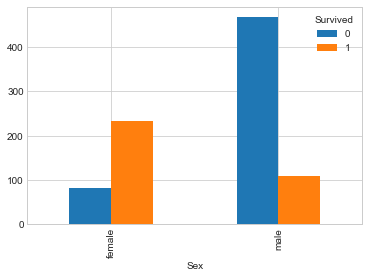

In [8]:
#绘制 存活于死亡的对比图
data.groupby(["Sex", "Survived"])["Survived"].count().unstack().plot(kind="bar")

图标是不同性别之间生还率的对比图，从图表中可以看出，男性的人数比女性多，但是女性的生还率高于男性

## 3、不同始发地生存率分析

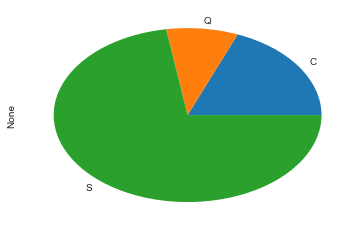

In [9]:
data.groupby("Embarked").size().plot(kind="pie")

这个饼图是不同出发地之间比例饼图，从饼图中可以看出，始发地为 Southampton 的乘客人数最多

In [10]:
group_by_sur_emb = data.groupby(["Embarked", "Survived"]).size()

group_by_sur_emb

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [11]:
#生存率统计
group_by_embarked = data.groupby("Embarked")["Survived"].mean()

group_by_embarked

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

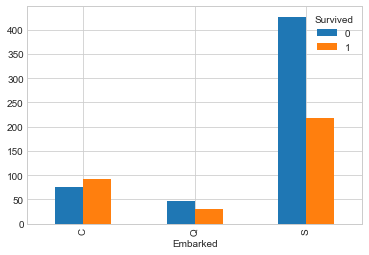

In [12]:
#绘制 各始发地的生存对比图
group_by_sur_emb.unstack().plot(kind="bar")

这个图是不同始发地之间，生还人数和死亡人数之间的对比图，从图中可以看出，始发地为Cherbourg 生存率最高

## 4、分析是否有家庭与生还率的关系

In [13]:


data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Family,Age_Group
0,0,3,male,22.0,1,0,NaN,S,True,"(20, 30]"
1,1,1,female,38.0,1,0,C85,C,True,"(30, 40]"
2,1,3,female,26.0,0,0,NaN,S,False,"(20, 30]"
3,1,1,female,35.0,1,0,C123,S,True,"(30, 40]"
4,0,3,male,35.0,0,0,NaN,S,False,"(30, 40]"


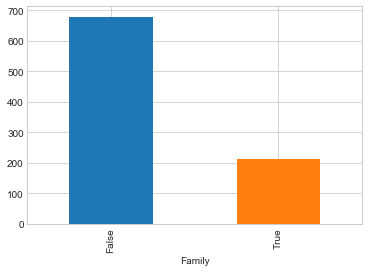

In [14]:
#拥有家庭和未拥有家庭的对比图
is_have_family = data.groupby("Family")

is_have_family.size().plot(kind="bar")

这个图是拥有家庭和未拥有家庭的对比图，从图中可以看出未拥有家庭的人数更多

In [15]:
#计算家庭生存率
is_have_family["Survived"].mean()

Family
False    0.331370
True     0.551887
Name: Survived, dtype: float64

从数据中可以看出来拥有家庭的生还率更高

## 5、分析生还率与年龄是否有关系


In [16]:
#整体人数分布情况
survived_with_age = data.groupby("Age_Group")["Survived"]
survived_with_age.count()


Age_Group
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Survived, dtype: int64

Text(0.5,1,'Age with Survived count')

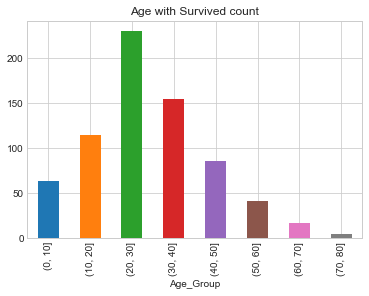

In [17]:
survived_with_age.count().plot(kind="bar")
plt.title("Age with Survived count")

这个图是不同年龄组之间人数的分布情况，可以看出20-30这组的人最多

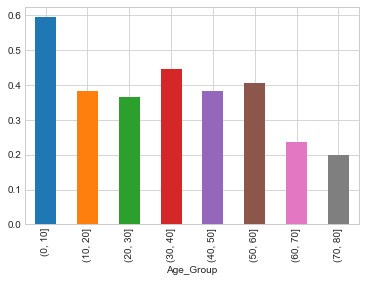

In [18]:
survived_with_age.mean().plot(kind="bar")

这个图是不同年龄组之间生还率的分布情况，可以看出0-10之间的生还率最高

## 6、总结
分析限制：  
实际总体容量为2224，本样本的容量为891，实际生还率为0.325，样本生还率为0.384，如果数据为随机数据，有较高的可信度。
因数据清洗部分已有Udacity完成，可能会造成一定的偏差，但是考虑到总体生还率与样本生还率没有显著差异，我认为样本与总体之间
没有显著的偏差。


1、性别与生存率有关系，女性的生存率高于男性  
2、始发地是Cherbourg的生存率比其他两个地方的更高，但是这个似乎不合情理，可能是因为不同始发地的乘客有其他的因素影响了生还率  
3、有家庭的生存率高于没有家庭的  
4、从年龄上来看0-10这组生还率会更高